# Task # 4 - To Explore Decision Tree Algorithm¶

## Bezawada Ruchitha

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
#load the iris dataset
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',axis=1,inplace=True)

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [7]:
df.shape

(150, 5)

In [8]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

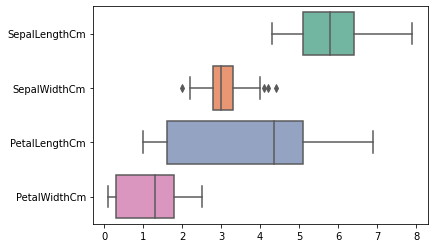

In [11]:
# Data visualization
sns.boxplot(data=df,orient="h", palette="Set2")

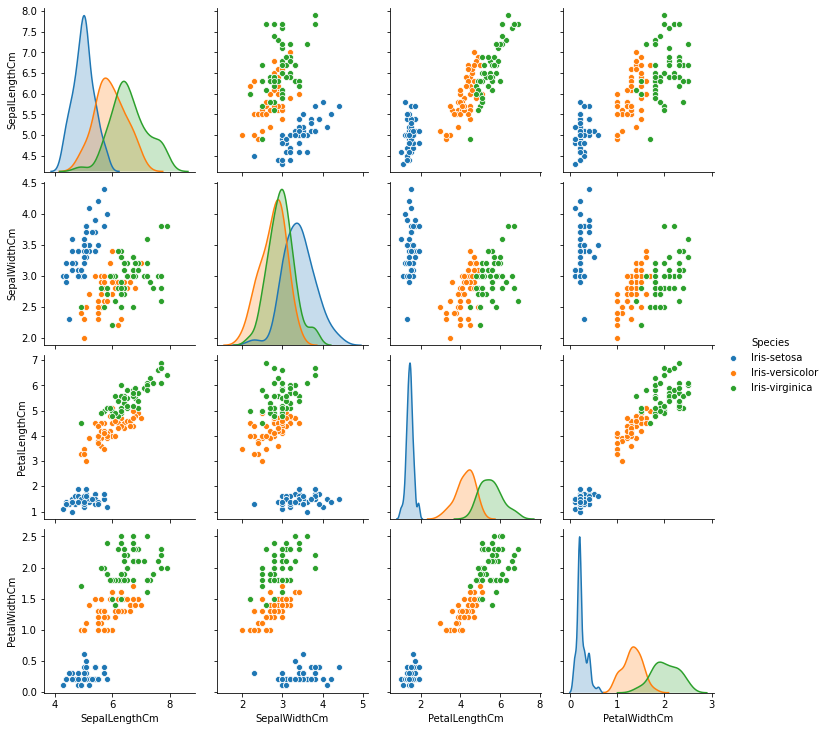

In [12]:
sns.pairplot(df.iloc[:,[0,1,2,3,4]],hue="Species")

In [13]:
label_enc=preprocessing.LabelEncoder()
df['Species']=label_enc.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X=df.drop('Species',axis=1).values
y=df['Species'].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
print("Shape of feature training data:",X_train.shape)
print("Shape of target training data:",y_train.shape)
print("Shape of feature test data:",X_test.shape)
print("Shape of target test data:",y_test.shape)

Shape of feature training data: (120, 4)
Shape of target training data: (120,)
Shape of feature test data: (30, 4)
Shape of target test data: (30,)


In [17]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
d_train=dtree.fit(X_train,y_train)

In [18]:
#Making a prediction
y_pred=dtree.predict(X_test)

In [19]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

1.0

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [24]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [25]:
features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']

In [26]:
from sklearn.tree import plot_tree

In [27]:
from sklearn import tree

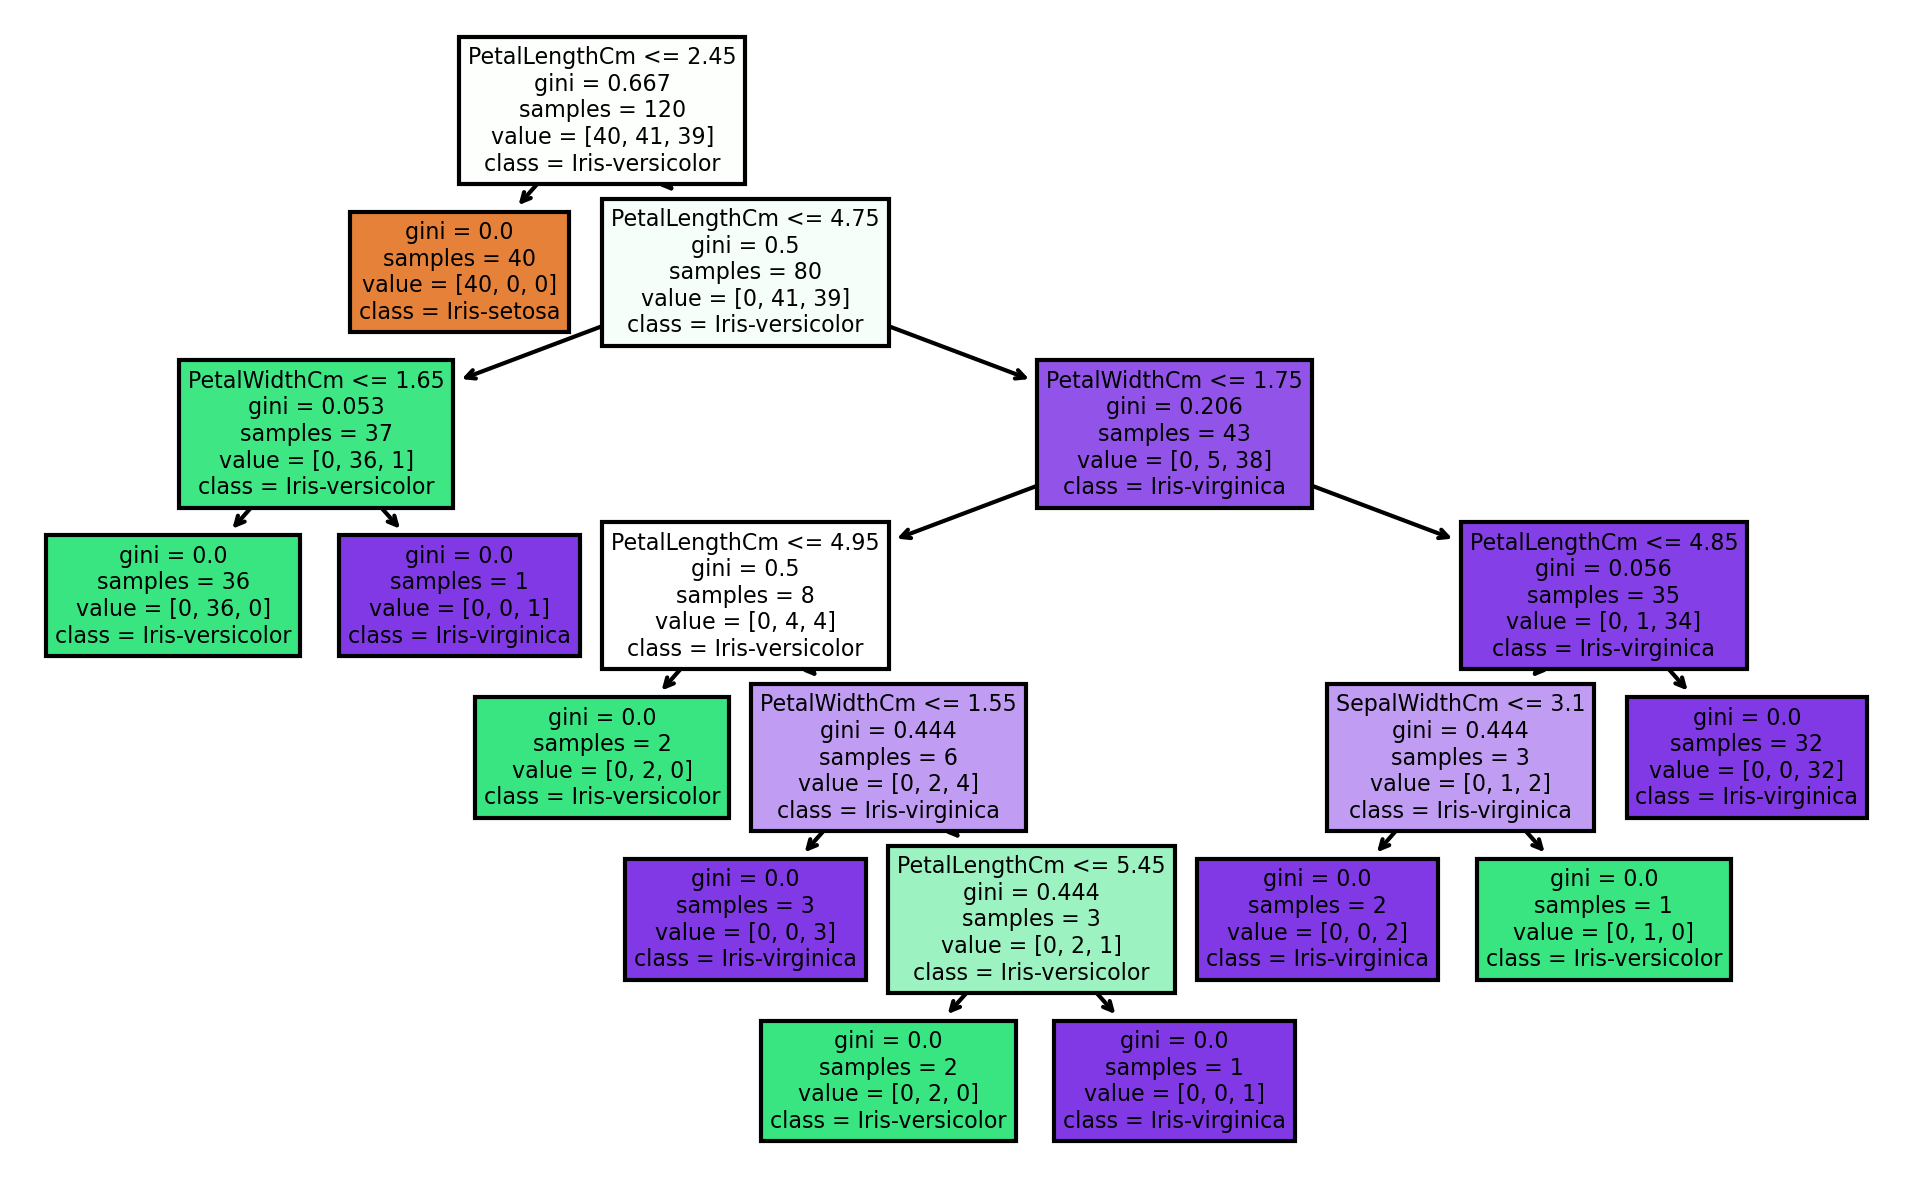

In [28]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,5),dpi=300)
tree.plot_tree(dtree,feature_names=features,class_names=targets,filled=True)
fig.savefig('Decision_Tree.jpg')

In [29]:
dtree.predict([[5.1,3.5,1.4,0.2]])

array([0])

In [30]:
dtree.predict([[6.2,3.9,5.6,1.9]])

array([2])